In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
%matplotlib inline

In [2]:
df = pd.read_csv('economic_index.csv')

In [3]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [4]:
df.drop(columns=['Unnamed: 0', 'year', 'month'], axis=1, inplace=True)

In [5]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [6]:
df.isnull().sum()    # Check for null values

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

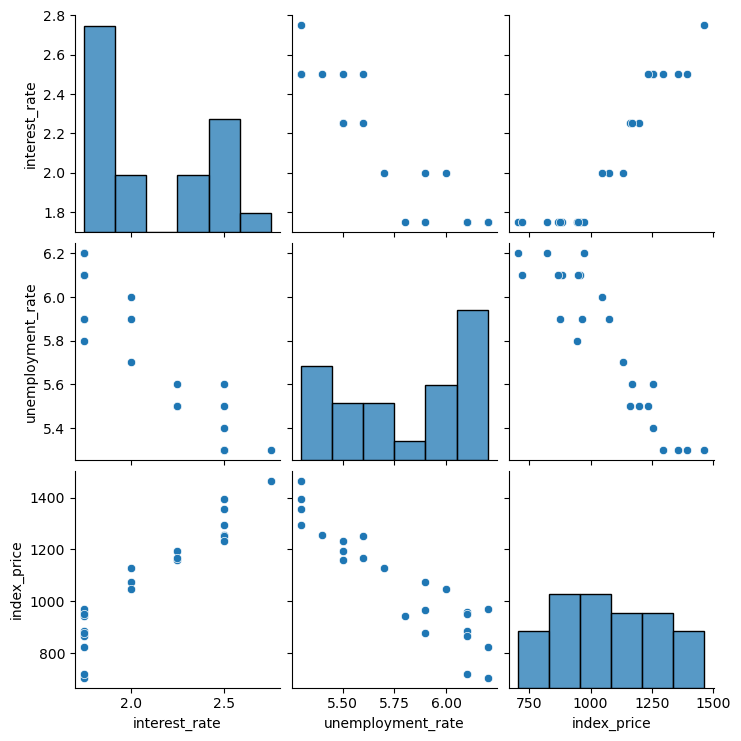

In [13]:
# Visualization

sns.pairplot(df)
plt.show()

In [14]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


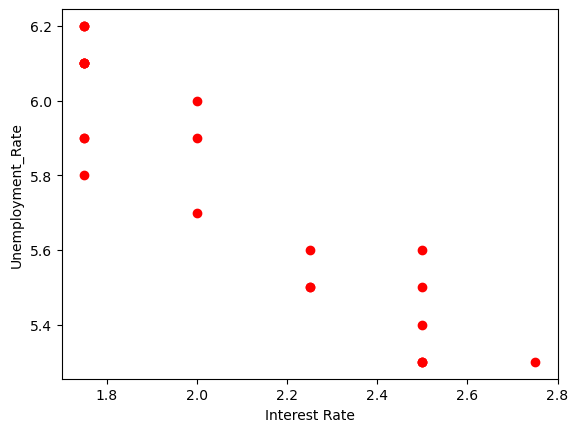

In [15]:
# Visualize the datapoints more closely

plt.scatter(df['interest_rate'], df['unemployment_rate'], color='r')
plt.xlabel('Interest Rate')
plt.ylabel('Unemployment_Rate')
plt.show()

In [19]:
# Independent and Dependent Features
X = df.iloc[:,:-1]  # Independent Feature
y = df.iloc[:,-1]   # Dependent Feature

In [21]:
X.head()


,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [23]:
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [25]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

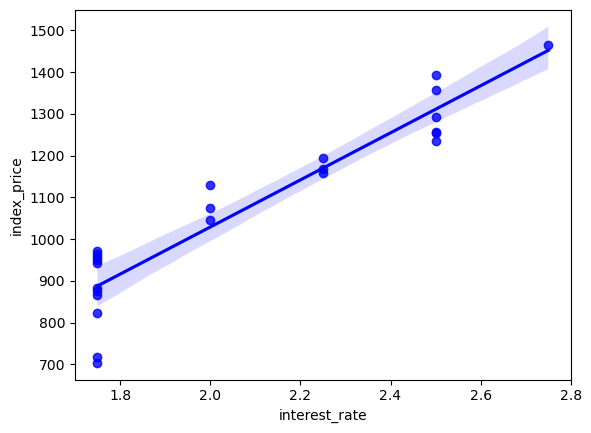

In [27]:
sns.regplot(data=df, x=df['interest_rate'], y=df['index_price'], color='b')
plt.show()

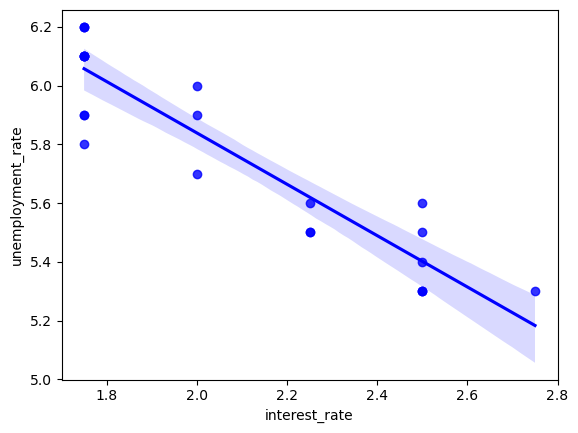

In [29]:
sns.regplot(data=df, x=df['interest_rate'], y=df['unemployment_rate'], color='b')
plt.show()

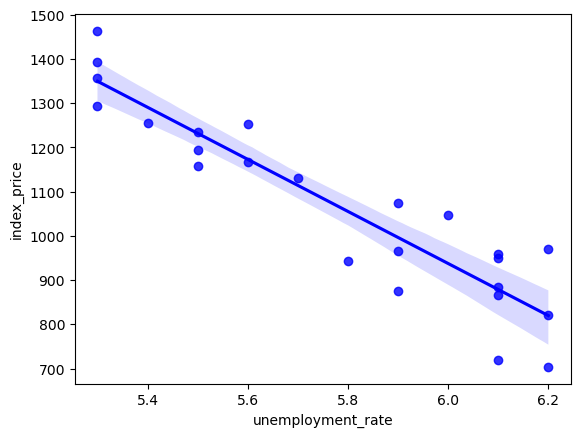

In [31]:
sns.regplot(data=df, x=df['unemployment_rate'], y=df['index_price'], color='b')
plt.show()

In [33]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [35]:
X_test = scaler.transform(X_test)

In [37]:
# Perform Regression
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [39]:
print(f"Coefficient/Slope of the straight line = {regression.coef_}")

Coefficient/Slope of the straight line = [  88.27275507 -116.25716066]


In [41]:
print(f"Intercept of the straight line = {regression.intercept_}")

Intercept of the straight line = 1053.4444444444443


In [43]:
# Let's do Cross-Validation

validation_score = cross_val_score(regression, X_train, y_train, scoring='neg_mean_squared_error', cv=3)

In [45]:
validation_score

# We got 3 MSE

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [47]:
np.mean(validation_score)

-5914.828180162396

In [49]:
scores = cross_val_score(regression, X_train, y_train, cv=5)

print("Accuracy scores for each fold:", scores)
print("Average accuracy:", scores.mean())

# The regression model gives an accuracy of 84.31% which is pretty decent.

Accuracy scores for each fold: [0.96373611 0.68310264 0.80679599 0.79355092 0.96849166]
Average accuracy: 0.8431354650801491


In [51]:
# Prediction

y_pred = regression.predict(X_test)

In [53]:
# Performance Metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MSE :  {mse}")
print(f"MAE :  {mae}")
print(f"RMSE:  {rmse}")

MSE :  5793.76288771258
MAE :  59.93578152323556
RMSE:  76.11677139574813


In [55]:
# Calculate r-square

score = r2_score(y_test, y_pred)
print(score)

0.8278978091457142


### Assumptions

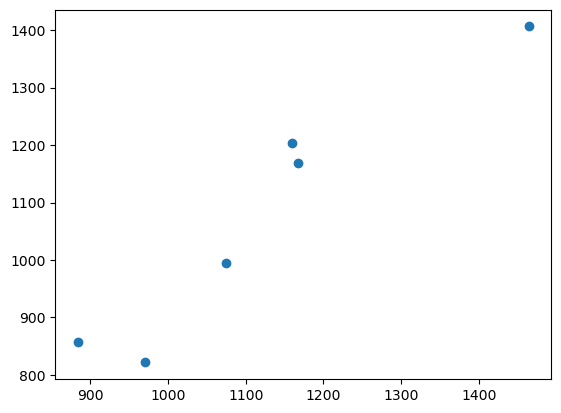

In [58]:
plt.scatter(y_test, y_pred)
plt.show()

In [60]:
residuals = y_test - y_pred

In [62]:
residuals

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64

C:\Users\User\AppData\Local\Temp\ipykernel_16076\2940283840.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, kde=True, hist=False)


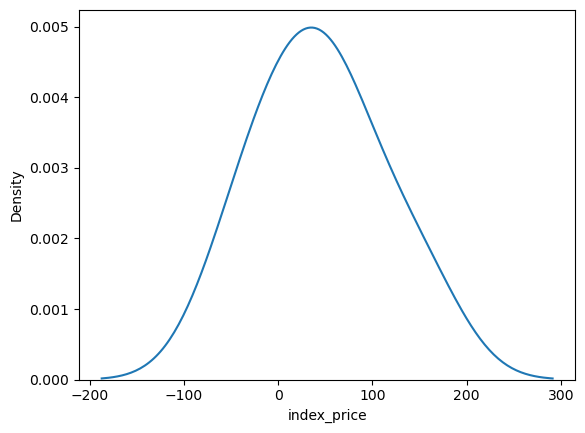

In [64]:
# Plot the residulas. If it forms a Normal Distribution curve that means we have a good model.

sns.distplot(residuals, kde=True, hist=False)
plt.show()

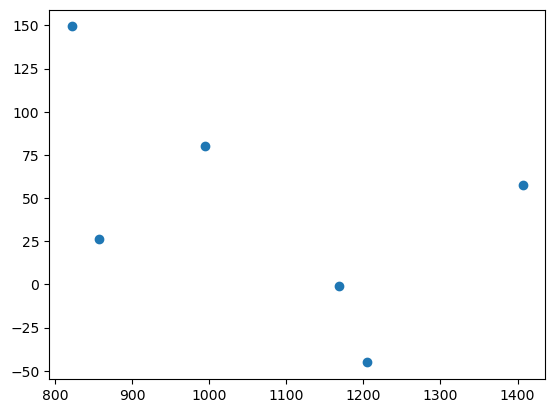

In [66]:
# Scatter Plot with respect to prediction and residuals. 
plt.scatter(y_pred, residuals)
plt.show()

# The data is uniformly distributed which means there is no problem.

### OLS Linear Regression Model

In [69]:
import statsmodels.api as sm

model = sm.OLS(y_train, X_train).fit()
prediction = model.predict(X_test)
print(prediction)

[ 150.78325954 -231.79392541  353.06855924 -195.73554836  -58.53452146
  114.72488249]


In [70]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Fri, 02 May 2025   Prob (F-statistic):                       0.754
Time:                        21:35:33   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

D:\Anaconda\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)
